In [1]:
import pandas as pd

# Load the dataset from the uploaded file
file_path = 'CarPrice_Assignment.xlsx'
car_data = pd.read_excel(file_path)

# Display the first few rows to understand the dataset structure
car_data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Check for missing values in the dataset
missing_values = car_data.isnull().sum()

# Display summary statistics to understand data distributions
summary_statistics = car_data.describe()

missing_values, summary_statistics


(car_ID              0
 symboling           0
 CarName             0
 fueltype            0
 aspiration          0
 doornumber          0
 carbody             0
 drivewheel          0
 enginelocation      0
 wheelbase           0
 carlength           0
 carwidth            0
 carheight           0
 curbweight          0
 enginetype          0
 cylindernumber      0
 enginesize          0
 fuelsystem          0
 boreratio           0
 stroke              0
 compressionratio    0
 horsepower          0
 peakrpm             0
 citympg             0
 highwaympg          0
 price               0
 dtype: int64,
            car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
 count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
 mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
 std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
 min      1.000000   -2.000000   86.600000  141.100000   60

In [5]:
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns
car_data_cleaned = car_data.drop(columns=["car_ID"])

# Extract brand names from CarName
car_data_cleaned['CarBrand'] = car_data_cleaned['CarName'].apply(lambda x: x.split(' ')[0].lower())
car_data_cleaned = car_data_cleaned.drop(columns=['CarName'])

# Encoding categorical variables
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                       'drivewheel', 'enginelocation', 'enginetype', 
                       'cylindernumber', 'fuelsystem', 'CarBrand']

label_encoders = {}
for col in categorical_columns:
    encoder = LabelEncoder()
    car_data_cleaned[col] = encoder.fit_transform(car_data_cleaned[col])
    label_encoders[col] = encoder

# Summary of cleaned data
car_data_cleaned.info(), car_data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    int32  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

(None,
    symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
 0          3         1           0           1        0           2   
 1          3         1           0           1        0           2   
 2          1         1           0           1        2           2   
 3          2         1           0           0        3           1   
 4          2         1           0           0        3           0   
 
    enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
 0               0       88.6      168.8      64.1  ...           5       3.47   
 1               0       88.6      168.8      64.1  ...           5       3.47   
 2               0       94.5      171.2      65.5  ...           5       2.68   
 3               0       99.8      176.6      66.2  ...           5       3.19   
 4               0       99.4      176.6      66.4  ...           5       3.19   
 
    stroke  compressionratio  horsepower  peakrpm  citympg  highw

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = car_data_cleaned.drop(columns=["price"])
y = car_data_cleaned["price"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((164, 24), (41, 24), (164,), (41,))

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_excel('CarPrice_Assignment.xlsx')

# Assuming 'price' is the target column
X = data.drop(columns=['price'])  # Drop the target column
y = data['price']  # Target variable

# If needed, encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    results[model_name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                              R2 Score           MSE           MAE
Linear Regression        -2.275784e+23  1.796595e+31  2.317175e+15
Decision Tree             8.665804e-01  1.053268e+07  2.098309e+03
Random Forest             9.534438e-01  3.675331e+06  1.387310e+03
Gradient Boosting         9.315610e-01  5.402849e+06  1.685616e+03
Support Vector Regressor -1.020678e-01  8.700167e+07  5.707022e+03


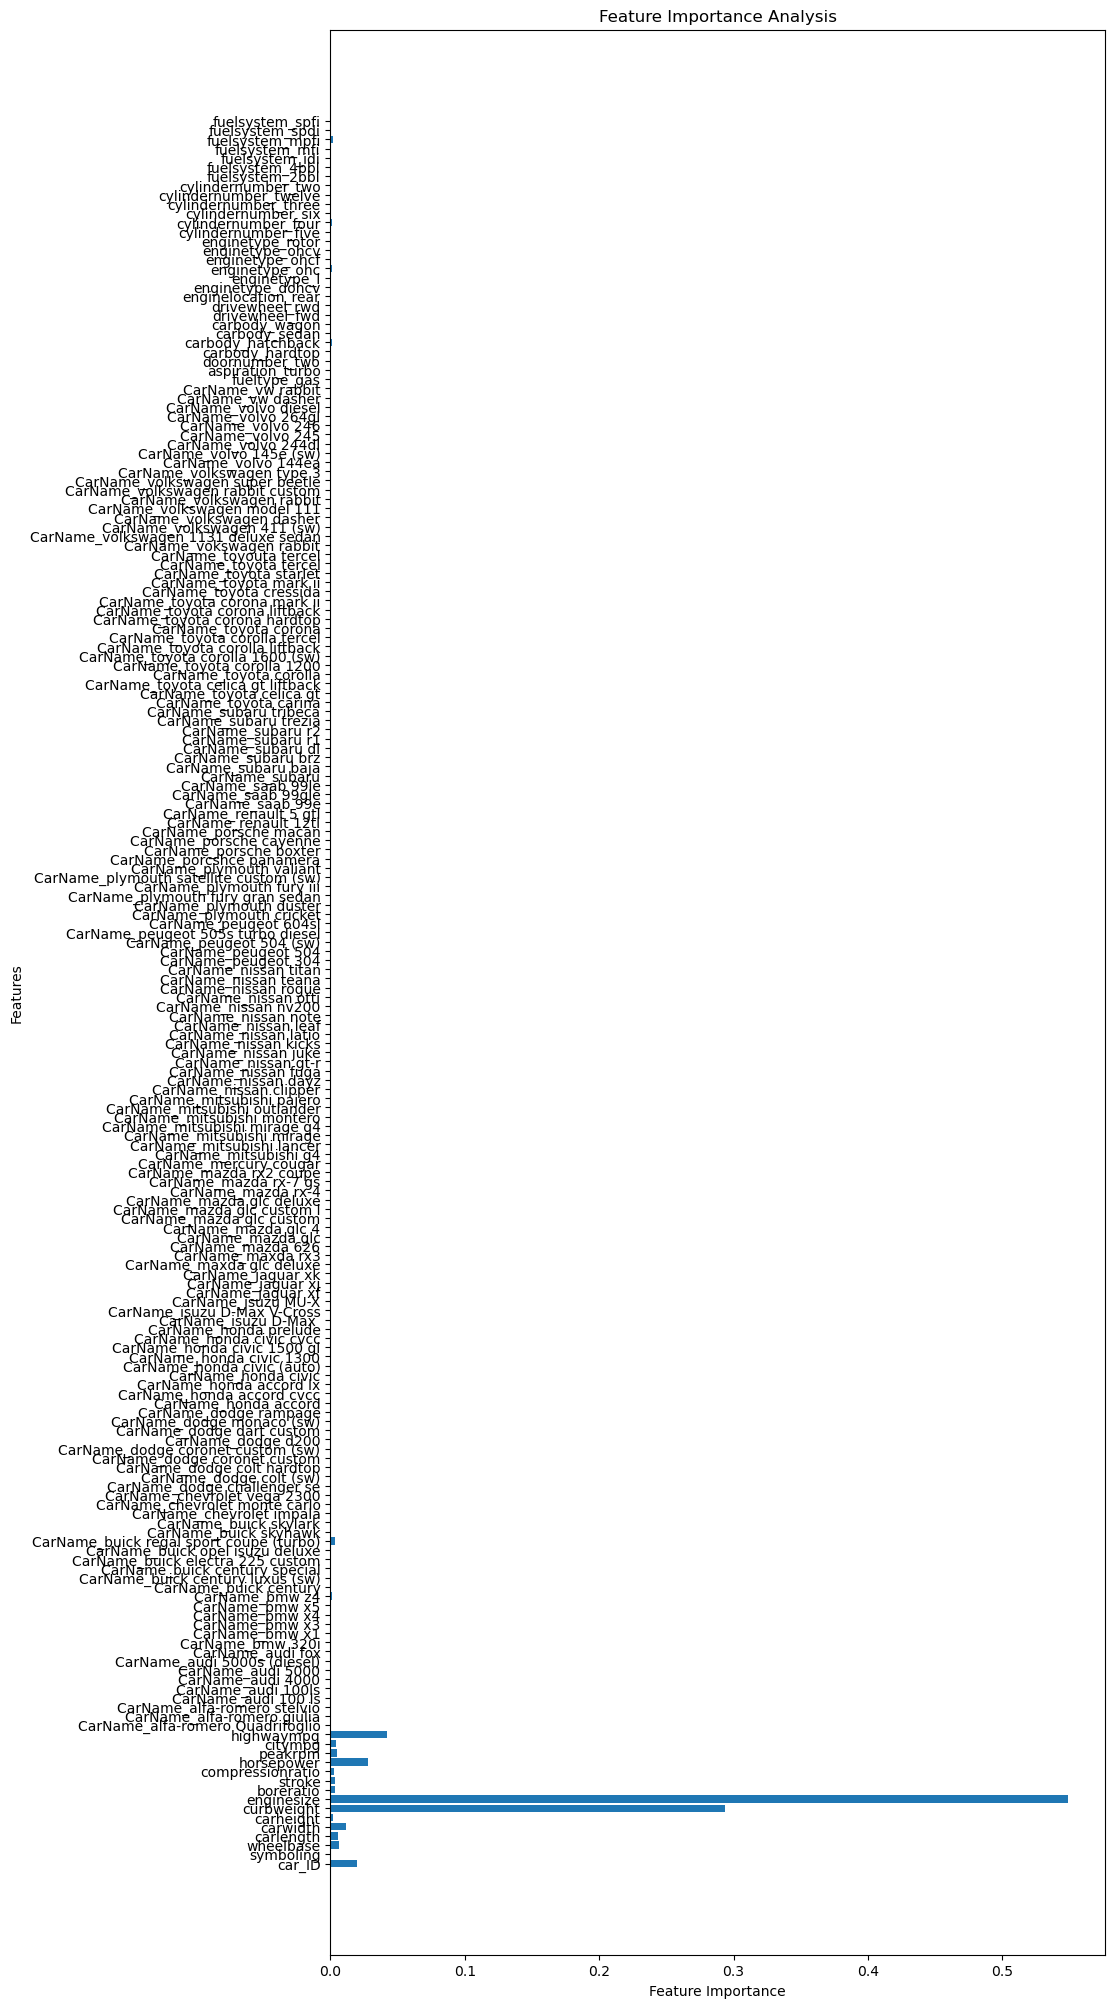

In [31]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importance
feature_importance = rf_model.feature_importances_
features = X.columns  # Use feature names from your dataset

# Plotting
plt.figure(figsize=(10, 25))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()


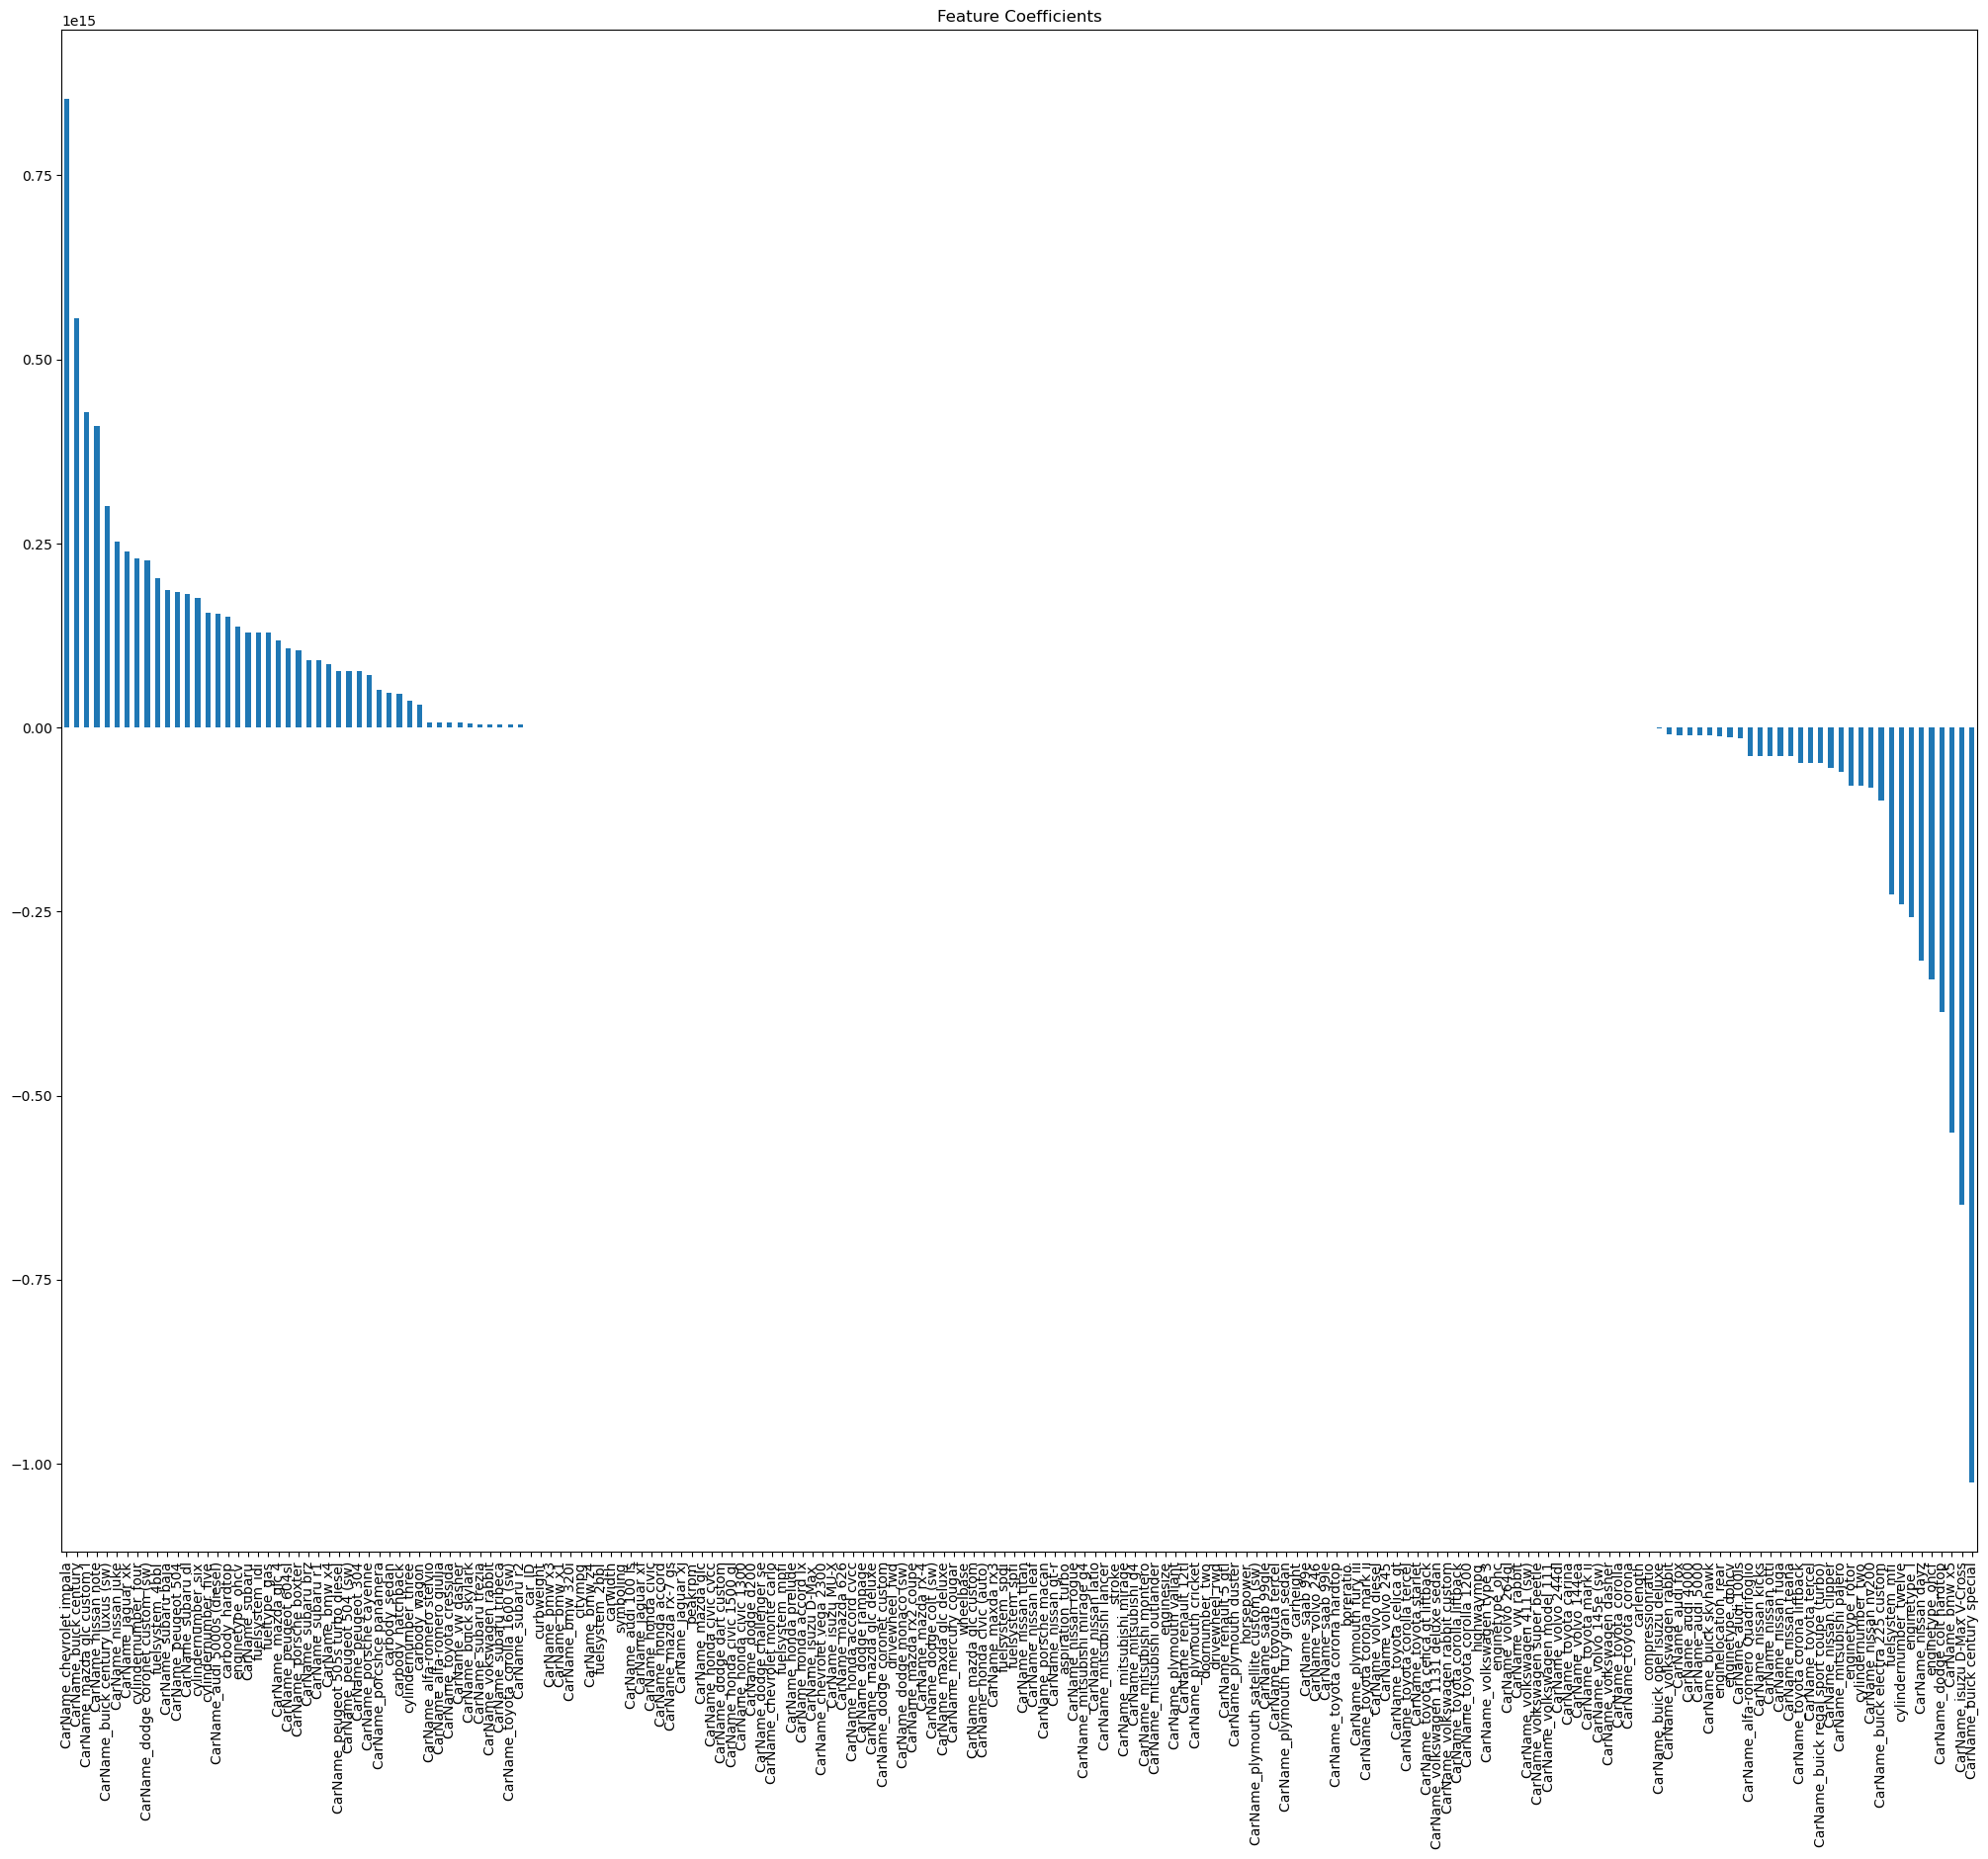

In [37]:
coefficients = pd.Series(models["Linear Regression"].coef_, index=features)
coefficients.sort_values(ascending=False).plot(kind='bar', figsize=(25,20))
plt.title("Feature Coefficients")
plt.show()


In [42]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="r2")
grid_search.fit(X_train, y_train)

# Display best parameters and performance
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
print(f"Best R2 Score: {grid_search.best_score_}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best R2 Score: 0.8794019448645964
